In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
dataset = pd.read_excel('DATASET.xlsx')

C:\Users\jahnv\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\jahnv\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
l = len(dataset)

In [4]:
sections = [*range(0,911,10),*range(919,l,10)]

In [5]:
year = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

In [6]:
pred_val_dataset = pd.DataFrame(index=['Section','Param9','Param10','Param11','Param12','Param13'])
actual_val_dataset = pd.DataFrame(index=['Section','Param9','Param10','Param11','Param12','Param13'])

In [7]:
for i in sections:
    
    curr_sect = dataset.iloc[i,0]
    year = pd.to_datetime(year)
    
    prev_yrs = year[0:9]
    pred_yr = year[9]
    
    col9 = dataset.iloc[i:i+9,10]
    model=ARIMA(col9,order=(0,0,0))
    model_fit=model.fit()
    pred_val9 = model_fit.predict(start=9,end=10,dynamic=True)
#     print(pred_val9)
    
    col10 = dataset.iloc[i:i+9,11]
    model=ARIMA(col10,order=(0,0,0))
    model_fit=model.fit()
    pred_val10 = model_fit.predict(start=9,end=10,dynamic=True)
#     print(pred_val10)
    
    col11 = dataset.iloc[i:i+9,12]
    model=ARIMA(col11,order=(0,0,0))
    model_fit=model.fit()
    pred_val11 = model_fit.predict(start=9,end=10,dynamic=True)
#     print(pred_val11)
    
    col12 = dataset.iloc[i:i+9,13]
    col12 = col12.astype('float64')
    model=ARIMA(col12,order=(0,0,0))
    model_fit=model.fit()
    pred_val12 = model_fit.predict(start=9,end=10,dynamic=True)
#     print(pred_val12)
    
    col13 = dataset.iloc[i:i+9,14]
    model=ARIMA(col13,order=(0,0,0))
    model_fit=model.fit()
    pred_val13 = model_fit.predict(start=9,end=10,dynamic=True)
#     print(pred_val13)
#     
    pred_val_dataset[i] = [curr_sect,list(pred_val9)[0],list(pred_val10)[0],list(pred_val11)[0],list(pred_val12)[0],list(pred_val13)[0]]
    actual_val_dataset[i] = [curr_sect,dataset.iloc[i+9,10],dataset.iloc[i+9,11],dataset.iloc[i+9,12],dataset.iloc[i+9,13],dataset.iloc[i+9,14]]
    

C:\Users\jahnv\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jahnv\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:880: RuntimeWarning: divide by zero encountered in log
  llf = -nobs / 2. * (log(2 * pi)

In [8]:
actual_val_dataset = actual_val_dataset.T
pred_val_dataset = pred_val_dataset.T

In [9]:
pred_val_dataset

,Section,Param9,Param10,Param11,Param12,Param13
0,Sec_1,0.577778,25.922222,6.333333,5.111111,1.764444
10,Sec_2,22.877778,13.411111,0.222222,4.0,0.759778
20,Sec_3,39.577778,0.0,0.0,9.333333,1.273889
30,Sec_4,5.477778,28.455556,29.111111,5.777778,1.571111
40,Sec_5,0.0,198.700001,31.555556,4.444444,1.285556
...,...,...,...,...,...,...
959,Sec_97,85.5,152.244444,5.666667,6.0,1.372556
969,Sec_98,1.111111,33.077778,14.888889,10.777778,1.045478
979,Sec_99,50.544444,39.4,7.888889,9.333333,0.727333
989,Sec_100,59.977778,93.055556,81.333333,8.444444,1.831667


In [10]:
actual = actual_val_dataset['Param9'] + actual_val_dataset['Param10'] + actual_val_dataset['Param11'] + actual_val_dataset['Param12']+actual_val_dataset['Param13']

In [11]:
predicted = pred_val_dataset['Param9'] + pred_val_dataset['Param10'] + pred_val_dataset['Param11'] + pred_val_dataset['Param12'] + pred_val_dataset['Param13']    

In [12]:
mse = np.square(np.subtract(actual,predicted)).mean()

In [13]:
rmse = math.sqrt(mse) 

In [14]:
rmse

206.11703500790065

In [15]:
plot_row = 40

random_rows = []
ls = list(pred_val_dataset.index)
for i in range(plot_row):
  random_rows.append(ls[random.randint(0,90)])

In [16]:
x_value = [*range(0,plot_row)]

In [17]:
def plot_graph(parameter,random_rows):
    true_value = actual_val_dataset[parameter][random_rows]
    predicted_value = pred_val_dataset[parameter][random_rows]
    figure(figsize=(13, 7), dpi=130)
    plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
    plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
    plt.xlabel('Number of Values')
    plt.ylabel('Values')
    plt.title('True vs Predicted Values of '+ parameter)
    plt.legend(loc = 'upper right')

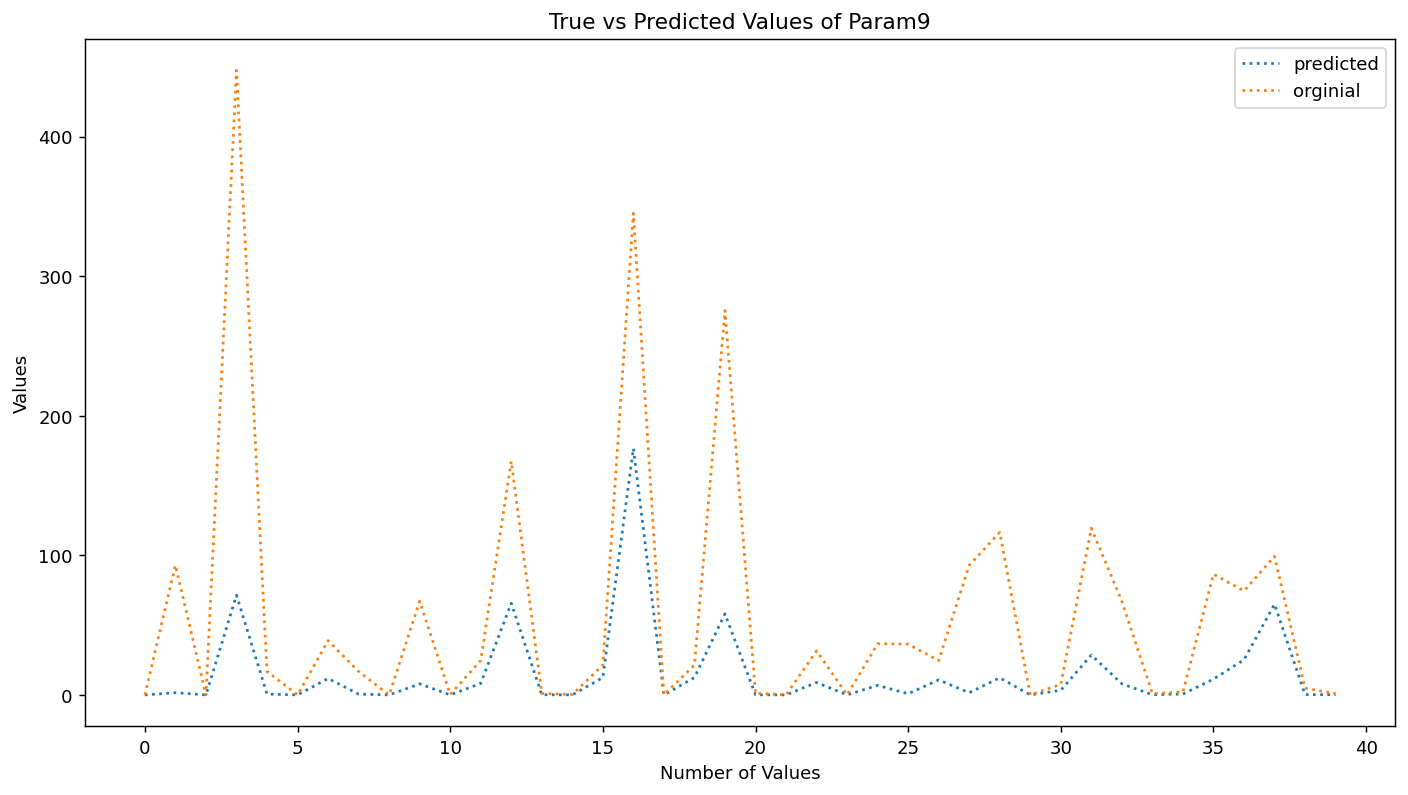

In [18]:
plot_graph('Param9',random_rows)

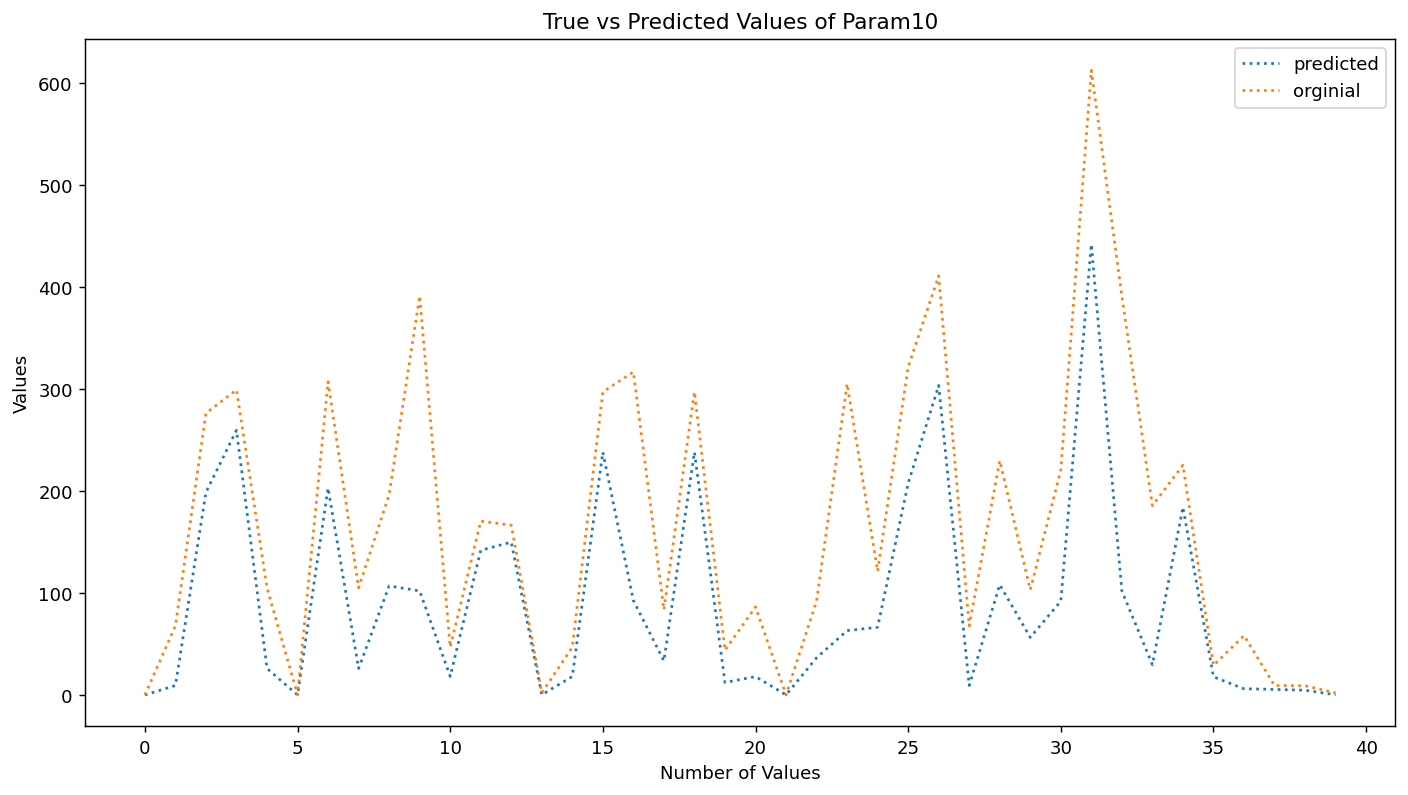

In [19]:
plot_graph('Param10',random_rows)

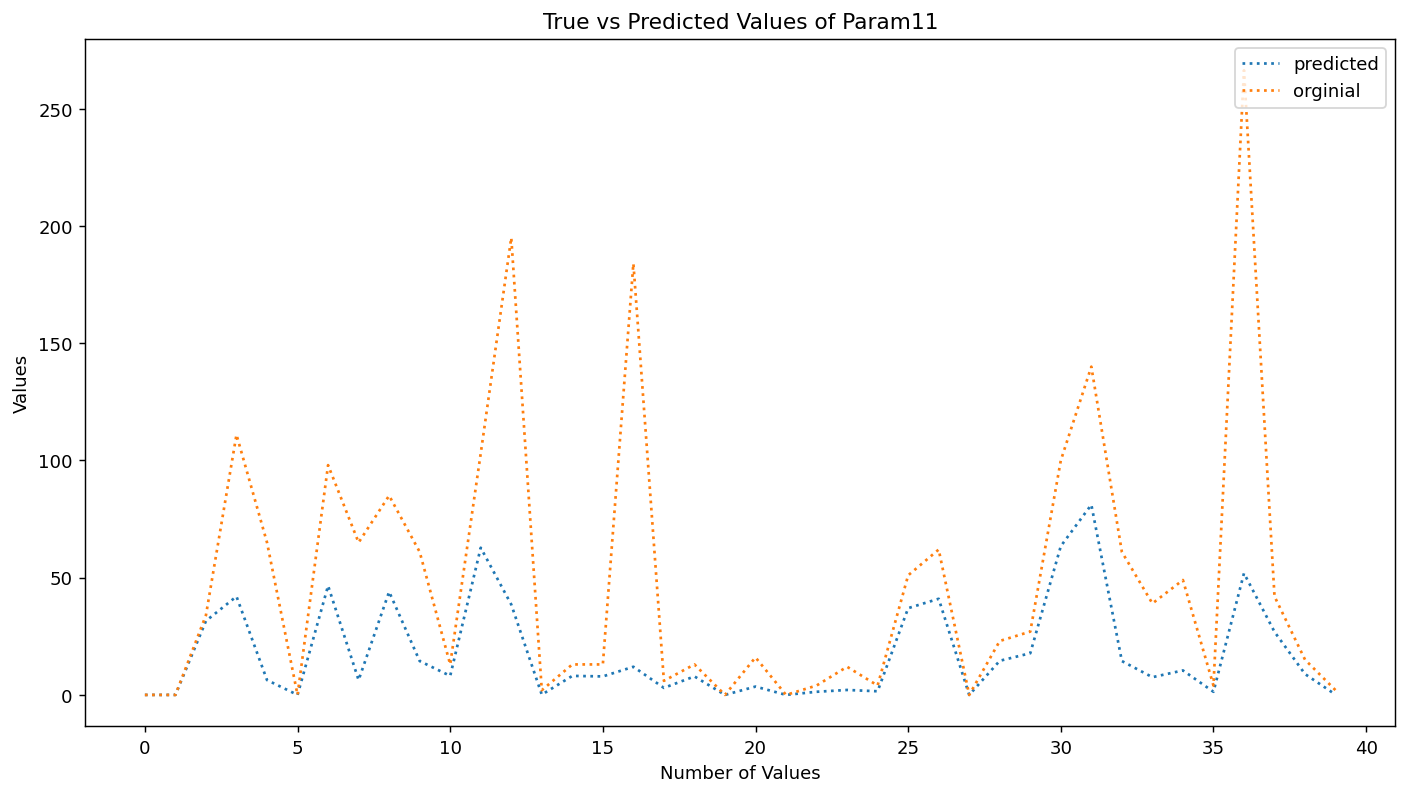

In [20]:
plot_graph('Param11',random_rows)

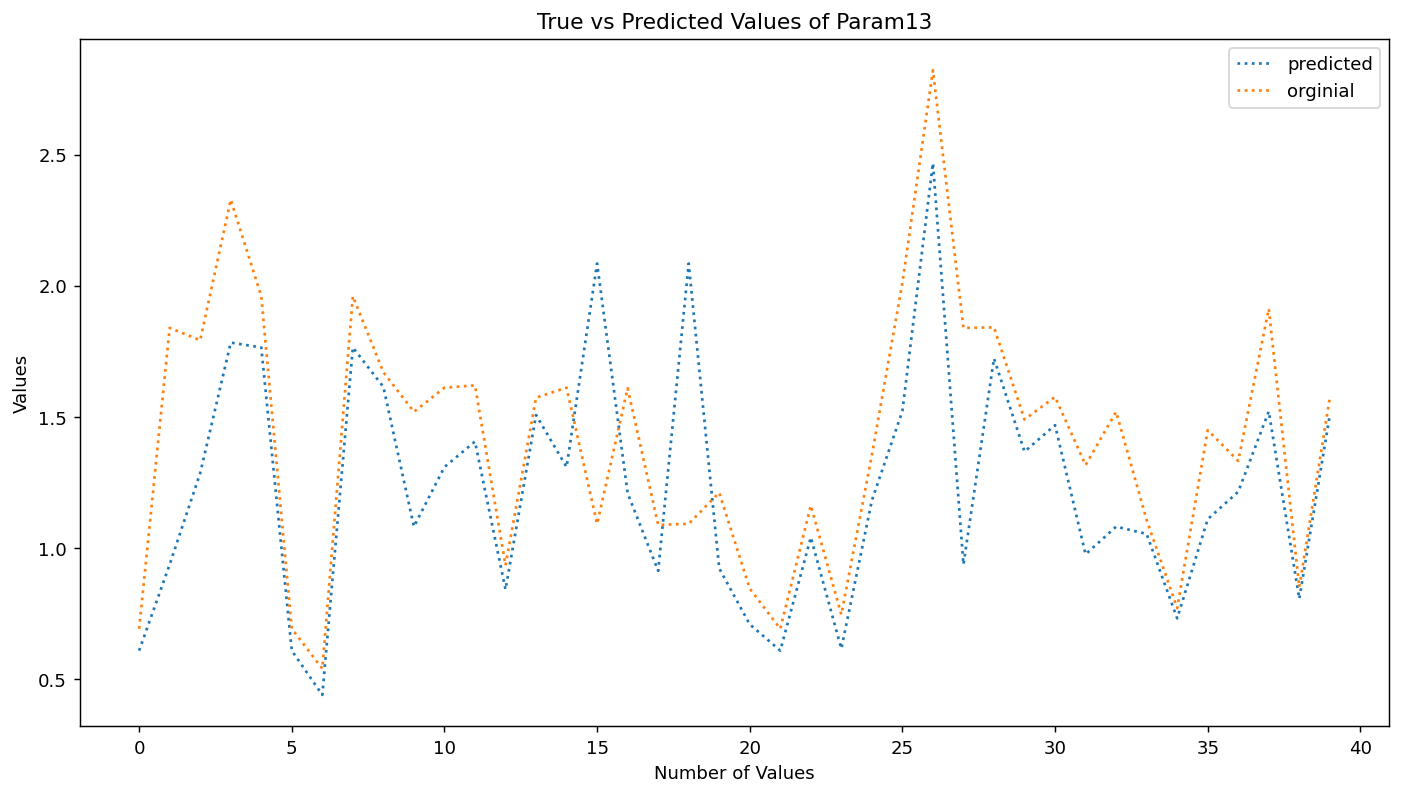

In [21]:
plot_graph('Param13',random_rows)